<a href="https://colab.research.google.com/github/veronica1013/supervised_and_unsupervised_learning/blob/main/Customer_Behaviour_Kira_Plastinina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.0 Understanding the Problem
Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

### 1.1 Introduction

Web analytics is not just a process for measuring web traffic but can be used as a tool for business and market research and assess and improve website effectiveness. It is the measurement, collection, analysis, and reporting of web data to understand and optimize web usage. 

Web analytics applications can also help companies measure the results of traditional print or broadcast advertising campaigns. It can be used to estimate how traffic to a website changes after launching a new advertising campaign. It further provides information about the number of visitors to a website and the number of page views. It also helps gauge traffic and popularity trends, which is useful for market research.

### 1.2 Data Used

The data used in this analysis was collected from the Kira Plastinina website metrics collected from the url data and google analytics, hence the data was apppropriate for the research.

## Understanding the Variables
+ The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 
+ The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
+ The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
+ The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
+ The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


## 1.3 Experimental design 
1. Problem Definition
2. Data Sourcing
3. Check the Data
4. Perform Data Cleaning
5. Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
6. Implement the Solution
7. Challenge the Solution
8. Follow up Questions
4. Conclusion 
5. Recommendation.

### Metric for Success
Formulating the marketing and sales strategies of the brand.

### The Objective
To perform clustering stating insights drawn from the analysis and visualizations.
To Implement, provide comparisons between approaches i.e. K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis.

## 2.0 Loading the Relevant Libraries and Packages

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
#install.packages('VIM')
install.packages('CatEncoders')
library(CatEncoders)

In [ ]:
%%R
library(dplyr)
library(readr)
library(data.table)
install.packages("e1071")
library(e1071)
library(magrittr)
library(knitr)
library(tidyverse)
#install.packages("factoextra")
library(factoextra)
#install.packages("devtools")
library(devtools)
#install.packages("Hmisc")
library(Hmisc)
library(corrplot)
library(CatEncoders)

### 2.1 Loading the Data

In [ ]:
%%R
#setting up the enviroment
getwd()

#locating the dataset /content/online_shoppers_intention.csv
setwd("//content")

#Loading the dataset
df <- read.csv("online_shoppers_intention.csv",TRUE,",")

### 2.3 Previewing the data

In [ ]:
%%R
#Preview the top of the dataset
head(df)

  Administrative Administrative_Duration Informational Informational_Duration
1              0                       0             0                      0
2              0                       0             0                      0
3              0                      -1             0                     -1
4              0                       0             0                      0
5              0                       0             0                      0
6              0                       0             0                      0
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1              1                0.000000  0.20000000 0.2000000          0
2              2               64.000000  0.00000000 0.1000000          0
3              1               -1.000000  0.20000000 0.2000000          0
4              2                2.666667  0.05000000 0.1400000          0
5             10              627.500000  0.02000000 0.0500000          0
6         

In [ ]:
%%R
#Preview thr bottom of the dataset
tail(df)

      Administrative Administrative_Duration Informational
12325              0                       0             1
12326              3                     145             0
12327              0                       0             0
12328              0                       0             0
12329              4                      75             0
12330              0                       0             0
      Informational_Duration ProductRelated ProductRelated_Duration BounceRates
12325                      0             16                 503.000 0.000000000
12326                      0             53                1783.792 0.007142857
12327                      0              5                 465.750 0.000000000
12328                      0              6                 184.250 0.083333333
12329                      0             15                 346.000 0.000000000
12330                      0              3                  21.250 0.000000000
       ExitRates PageValues

#### Size of the dataset

In [ ]:
%%R
#Size  of the dataset
dim(df)

[1] 12330    18


The dataset has 12,330 rows and 18 columns.

In [ ]:
%%R
#Data types of the variavbles
sapply(df, class)

         Administrative Administrative_Duration           Informational 
              "integer"               "numeric"               "integer" 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              "numeric"               "integer"               "numeric" 
            BounceRates               ExitRates              PageValues 
              "numeric"               "numeric"               "numeric" 
             SpecialDay                   Month        OperatingSystems 
              "numeric"             "character"               "integer" 
                Browser                  Region             TrafficType 
              "integer"               "integer"               "integer" 
            VisitorType                 Weekend                 Revenue 
            "character"               "logical"               "logical" 


In [ ]:
%%R
#Getting the number of unique values for each variable.
print(df %>% summarise_all(n_distinct))

  Administrative Administrative_Duration Informational Informational_Duration
1             28                    3337            18                   1260
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1            312                    9553        1873      4778       2704
  SpecialDay Month OperatingSystems Browser Region TrafficType VisitorType
1          6    10                8      13      9          20           3
  Weekend Revenue
1       2       2


In [ ]:
%%R
#Checking the duplicates using duplicated.data.frame() function

table(duplicated.data.frame(df))


FALSE  TRUE 
12211   119 


In [ ]:
%%R
#Removing the duplicates
data <- df %>% distinct()

#Recheck for duplicates
table(duplicated.data.frame(data))


FALSE 
12211 


In [ ]:
%%R
null <- data[!complete.cases(data),] 
 #Give total number of rows with missing values        
dim(null)


[1] 12 18


R[write to console]: Loading required package: colorspace

R[write to console]: Loading required package: grid

R[write to console]: VIM is ready to use.


R[write to console]: Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues

R[write to console]: 
Attaching package: ‘VIM’


R[write to console]: The following object is masked from ‘package:datasets’:

    sleep





 Variables sorted by number of missings: 
                Variable        Count
          Administrative 0.0009827205
 Administrative_Duration 0.0009827205
           Informational 0.0009827205
  Informational_Duration 0.0009827205
          ProductRelated 0.0009827205
 ProductRelated_Duration 0.0009827205
             BounceRates 0.0009827205
               ExitRates 0.0009827205
              PageValues 0.0000000000
              SpecialDay 0.0000000000
                   Month 0.0000000000
        OperatingSystems 0.0000000000
                 Browser 0.0000000000
                  Region 0.0000000000
             TrafficType 0.0000000000
             VisitorType 0.0000000000
                 Weekend 0.0000000000
                 Revenue 0.0000000000


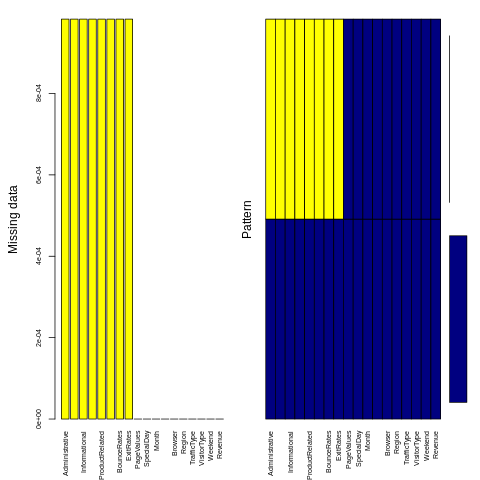

In [ ]:
%%R
#Visualizing the missing data

library(VIM)
par(mfrow = c(2,2))
mice_plot <- aggr(data, col=c('navyblue','yellow'),
                    numbers=TRUE, sortVars=TRUE,
                    labels=names(data), cex.axis=.7,
                    gap=3, ylab=c("Missing data","Pattern"))

In [ ]:
%%R
#Omiting the missing values
data <- na.omit(data)

#Check if there are anymore missing values in the new dataframe
sum(is.na(data))

[1] 0


In [ ]:
%%R
#Omiting the missing values
data <- na.omit(data)

#Check if there are anymore missing values in the new dataframe
sum(is.na(data))


[1] 0


### 3.0 Feature Engineering

I will combine related variables such as Administrative,Informational and ProductRelated. They are all related to number of pages visited. 

Other related variables to combine are Administrative Duration,Informational Duration and ProductRelated Duration as they all related to duration spent on pages.

In [ ]:
%%R
#Combining the  nunmber of pages visited
pages <- c('Administrative','Informational', 'ProductRelated')
Pages_Visited = rowSums(data[,pages])
data <- cbind(data,Pages_Visited)

#Calculating the total duration spent on pages
dur <-c('Administrative_Duration','Informational_Duration', 'ProductRelated_Duration')
Pages_Duration = rowSums(data[,dur])
data <- cbind(data,Pages_Duration)

#Dropping the columns that have been combined
new_data <- data
new_data[,c('Administrative','Informational', 'ProductRelated','Administrative_Duration','Informational_Duration', 'ProductRelated_Duration')] <- list(NULL)

#Preview the new data
head(new_data)


  BounceRates ExitRates PageValues SpecialDay Month OperatingSystems Browser
1  0.20000000 0.2000000          0          0   Feb                1       1
2  0.00000000 0.1000000          0          0   Feb                2       2
3  0.20000000 0.2000000          0          0   Feb                4       1
4  0.05000000 0.1400000          0          0   Feb                3       2
5  0.02000000 0.0500000          0          0   Feb                3       3
6  0.01578947 0.0245614          0          0   Feb                2       2
  Region TrafficType       VisitorType Weekend Revenue Pages_Visited
1      1           1 Returning_Visitor   FALSE   FALSE             1
2      1           2 Returning_Visitor   FALSE   FALSE             2
3      9           3 Returning_Visitor   FALSE   FALSE             1
4      2           4 Returning_Visitor   FALSE   FALSE             2
5      1           4 Returning_Visitor    TRUE   FALSE            10
6      1           3 Returning_Visitor   FALSE 

In [ ]:
%%R
#Label Encode the VisitorType column
type = c("Returning_Visitor","New_Visitor")
lab_rev = LabelEncoder.fit(new_data[,'VisitorType'])
new_data$VisitorType = transform(lab_rev, new_data[,'VisitorType'])

lab_mon = LabelEncoder.fit(new_data[,'Month'])
new_data$Month = transform(lab_mon, new_data[,'Month'])

#Set the logical values to numeric
new_data$Weekend <- as.numeric(new_data$Weekend)
new_data$Revenue <- as.numeric(new_data$Revenue)

#Preview the data
head(new_data)


  BounceRates ExitRates PageValues SpecialDay Month OperatingSystems Browser
1  0.20000000 0.2000000          0          0     3                1       1
2  0.00000000 0.1000000          0          0     3                2       2
3  0.20000000 0.2000000          0          0     3                4       1
4  0.05000000 0.1400000          0          0     3                3       2
5  0.02000000 0.0500000          0          0     3                3       3
6  0.01578947 0.0245614          0          0     3                2       2
  Region TrafficType VisitorType Weekend Revenue Pages_Visited Pages_Duration
1      1           1           3       0       0             1       0.000000
2      1           2           3       0       0             2      64.000000
3      9           3           3       0       0             1      -3.000000
4      2           4           3       0       0             2       2.666667
5      1           4           3       1       0            10     627.

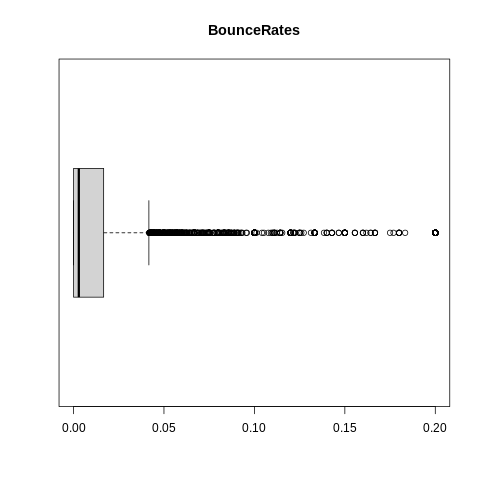

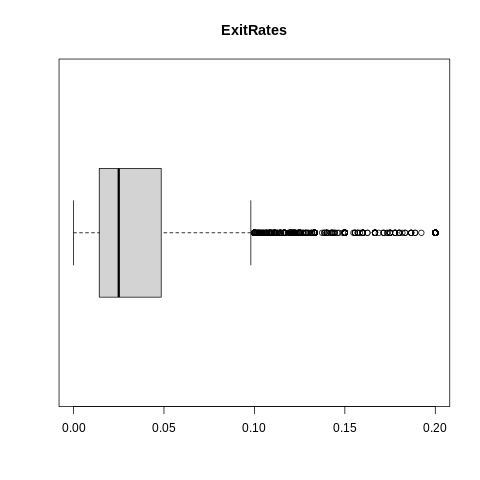

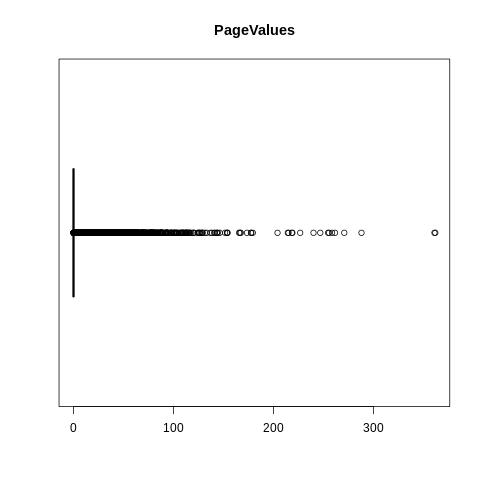

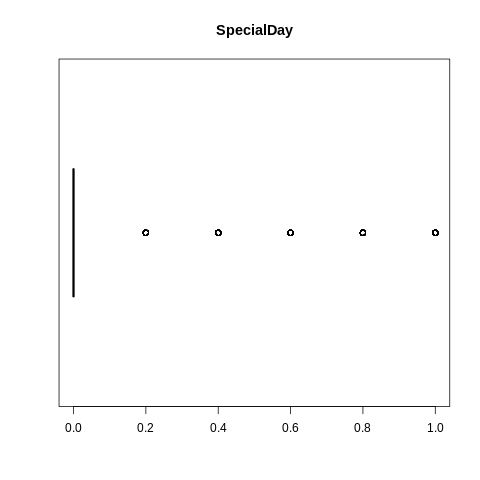

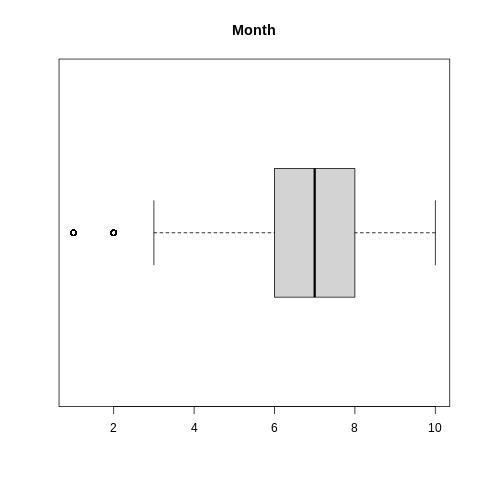

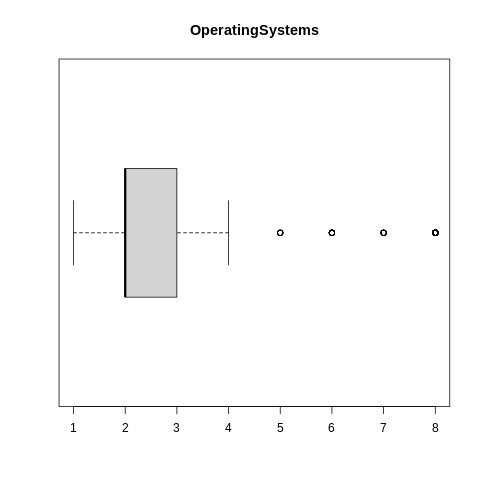

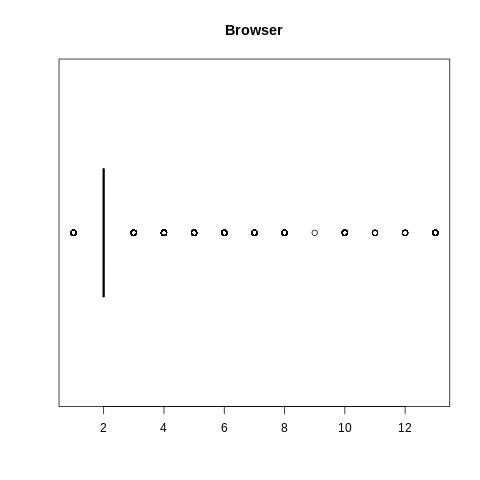

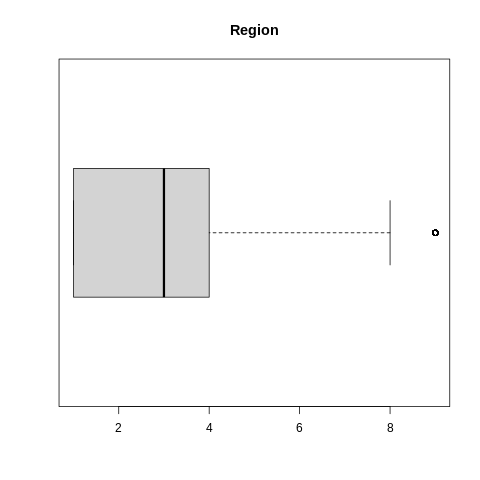

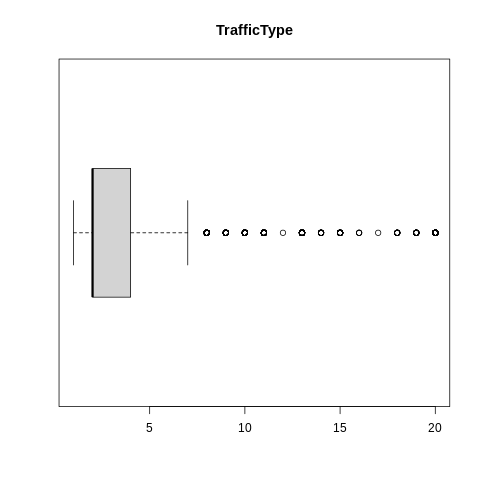

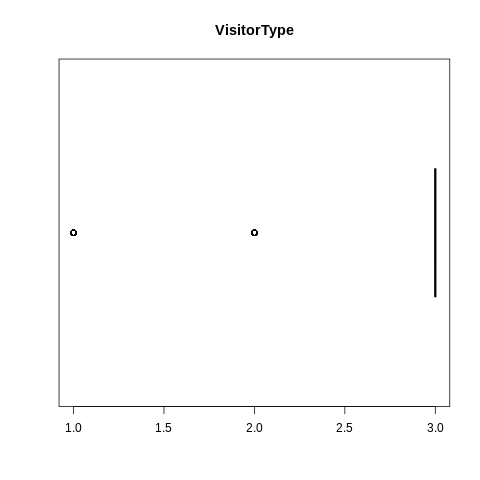

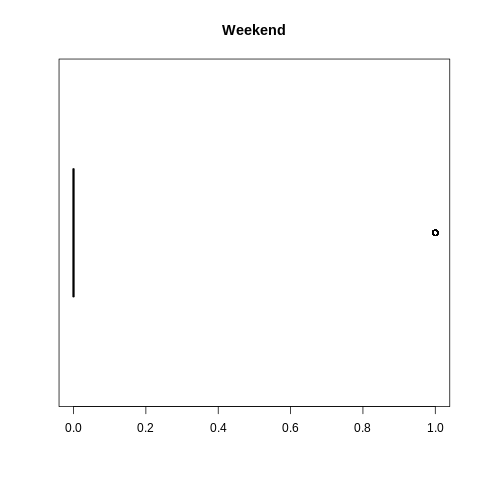

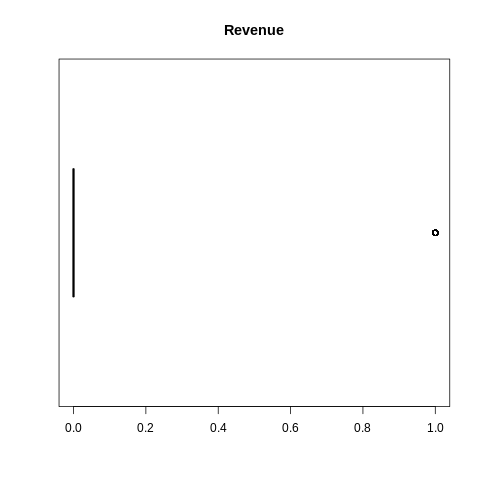

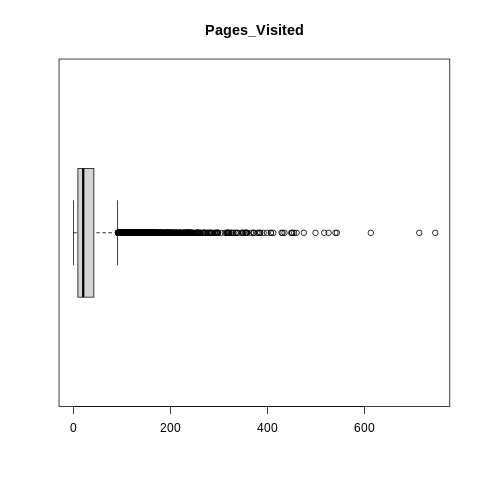

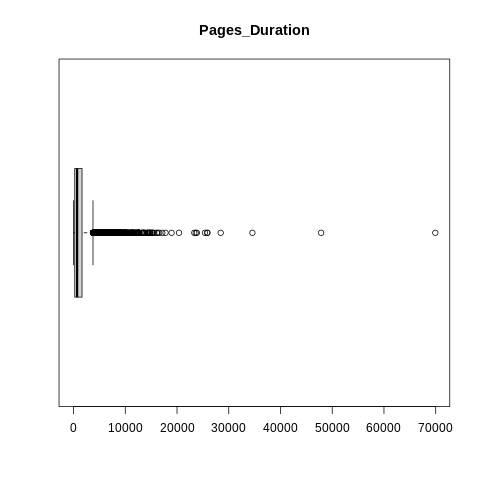

In [ ]:
%%R
#Checking for outliers
#par(mfrow = c(2,1))
for (i in 1:14){
 boxplot(new_data[,i], main = names(new_data)[i], horizontal = TRUE) 
}

There were a lot of outiers in the data. To maintaint the authenticity of the data(considering that all website visitors behavior is unque), we decided to keep the autliers.

## 4.0 Exploratory Data Analysis

In [ ]:
%%R

#Descriptive statistics

describe(data)

data 

 20  Variables      12199  Observations
--------------------------------------------------------------------------------
Administrative 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   12199        0       27    0.898     2.34    3.193        0        0 
     .25      .50      .75      .90      .95 
       0        1        4        7        9 

lowest :  0  1  2  3  4, highest: 22 23 24 26 27
--------------------------------------------------------------------------------
Administrative_Duration 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   12199        0     3336    0.896    81.68    125.8     0.00     0.00 
     .25      .50      .75      .90      .95 
    0.00     9.00    94.75   227.05   352.23 

lowest :   -1.000000    0.000000    1.333333    2.000000    3.000000
highest: 2407.423810 2629.253968 2657.318056 2720.500000 3398.750000
--------------------------------------------------------------------------------
Info

***SUMMARY***


**Month**
> The website had the most visitors during the months of May, with 27.3% of   total activity for the entire period and november which had 24.5% of all viisits.

**Operrating System**
> 53.6% of all visitors were using operating system type 2 while 20.9% were using type 1

**Browser**
> Browser 2 had the most visitors with 64.6% while browser 3 was used by 19.9% of the visitors.

**Region**
>38.6% of all visitors were from region 1 followed by region 3 which had 19.5% of all visitors

**Traffic Type**

> Most of the visitors were directed from traffic type 2 which brought in 32% of all visitors followed by type 1 which brought in 19.5% of all visitors and type 2 wuth  16.5%. Trafic type 12,17 and 16 did not bring in any visitors for the enter duration under analysis.

**Visitor Type**

> 193.9% of the visitors were new visitors while 85.5% were return visitors.

**Weekend**
> 23.4% of site visits were during the weekend while the rest 76.6% were during the weekdays.


In [ ]:
%%R
#Make a dataframe of numeric data descriptive statistics
num.col <- Filter(is.numeric, new_data)
desc_stats <- data.frame(
  min = apply(num.col, 2, min),
  median = apply(num.col, 2, median),
  mean_df = apply(num.col, 2, mean),
  SD = apply(num.col, 2, sd),
  max = apply(num.col, 2, max),
  skew = apply(num.col,2, skewness),
  Kurt = apply(num.col,2, kurtosis)
)
stat <- round(desc_stats,1)
stat


                 min median mean_df     SD     max skew  Kurt
BounceRates        0    0.0     0.0    0.0     0.2  3.2   9.3
ExitRates          0    0.0     0.0    0.0     0.2  2.2   4.6
PageValues         0    0.0     6.0   18.7   361.8  6.3  64.9
SpecialDay         0    0.0     0.1    0.2     1.0  3.3   9.8
Month              1    7.0     6.2    2.4    10.0 -0.8  -0.4
OperatingSystems   1    2.0     2.1    0.9     8.0  2.0  10.3
Browser            1    2.0     2.4    1.7    13.0  3.2  12.5
Region             1    3.0     3.2    2.4     9.0  1.0  -0.2
TrafficType        1    2.0     4.1    4.0    20.0  2.0   3.5
VisitorType        1    3.0     2.7    0.7     3.0 -2.0   2.2
Weekend            0    0.0     0.2    0.4     1.0  1.3  -0.4
Revenue            0    0.0     0.2    0.4     1.0  1.9   1.6
Pages_Visited      0   20.0    34.9   46.6   746.0  4.2  29.5
Pages_Duration    -3  691.4  1324.0 2044.2 69921.6  7.5 150.6


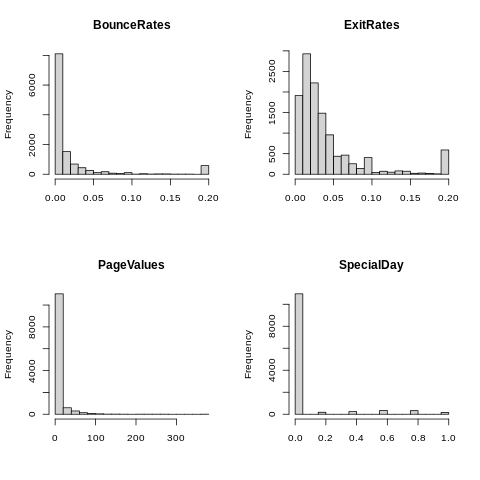

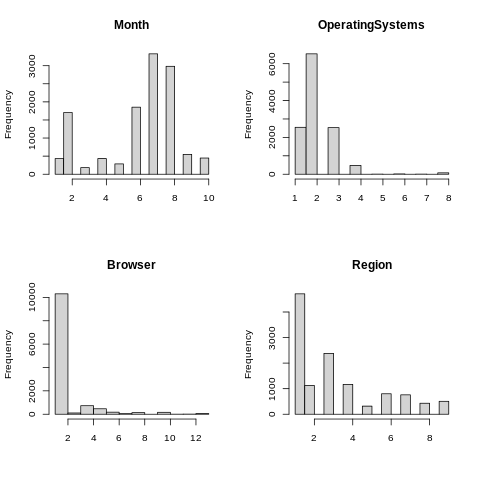

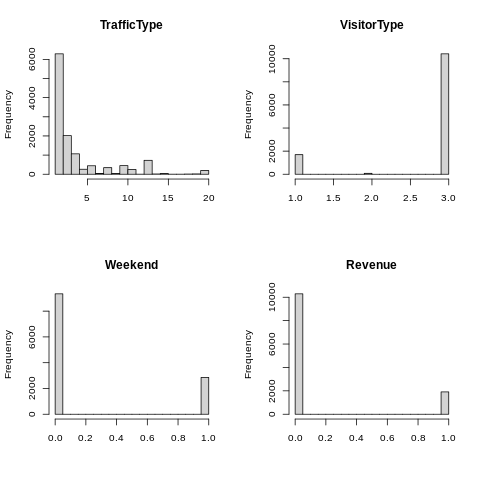

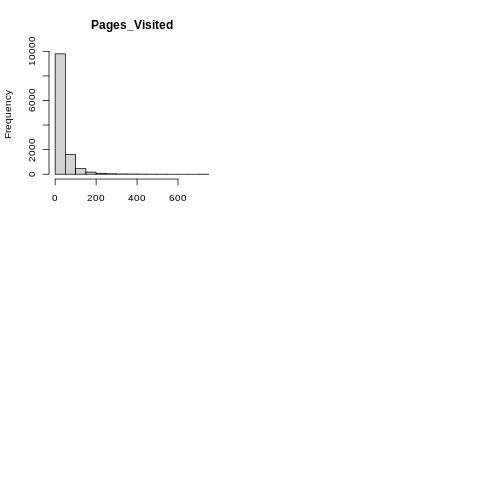

In [ ]:
%%R
# Data distribution(Histogram)
par(mfrow = c(2,2))
for (i in 1:13){
  hist(num.col[,i],main = names(num.col)[i], xlab = NULL)
  
}


### Analysis

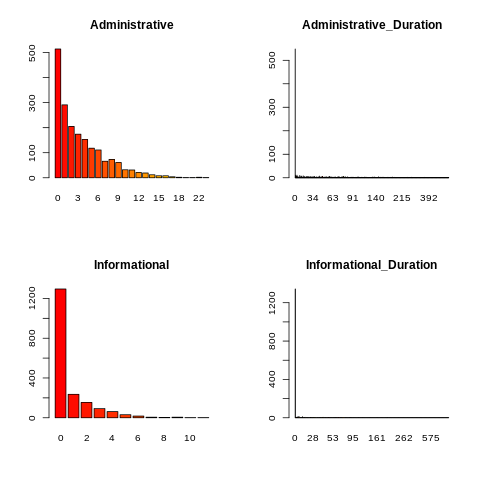

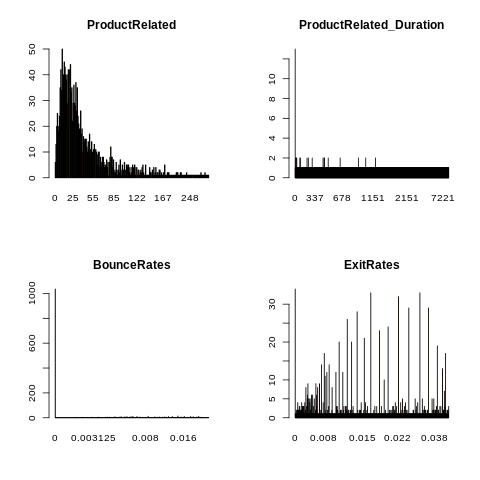

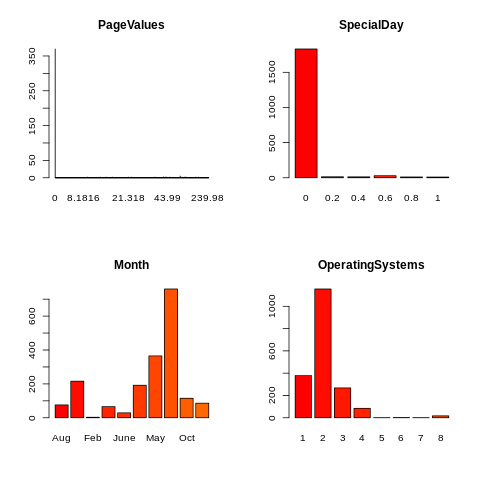

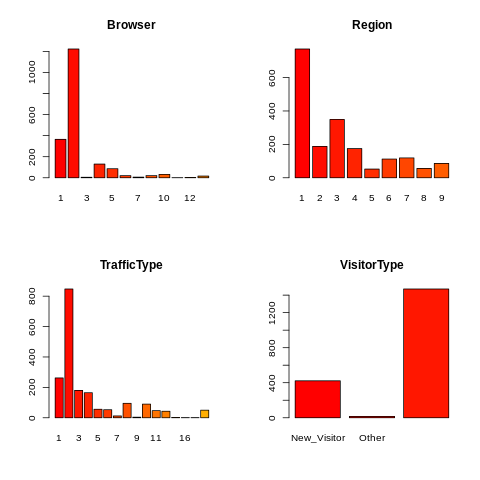

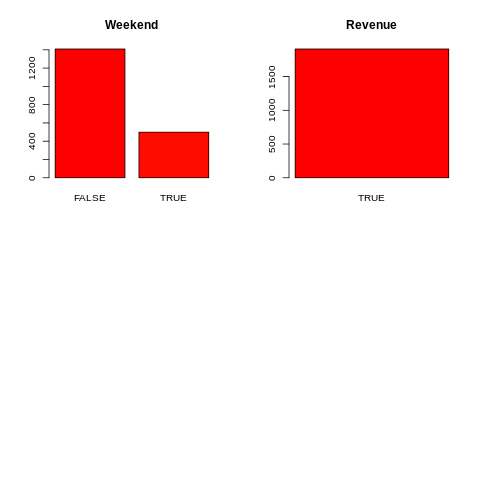

In [ ]:
%%R
#Make a sub dataset where revenue is True
Rev <- data[data$Revenue == TRUE,]

#Plot to view customer behaviour
par(mfrow = c(2,2))
for (i in 1:18){
  barplot(table(Rev[,i]),main = names(Rev)[i], col = heat.colors((30)))
  
}


In [ ]:
%%R

#Descriptive statistics

describe(Rev)

Rev 

 20  Variables      1908  Observations
--------------------------------------------------------------------------------
Administrative 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1908        0       23    0.974    3.394    3.877        0        0 
     .25      .50      .75      .90      .95 
       0        2        5        9       11 

lowest :  0  1  2  3  4, highest: 18 19 20 22 26
--------------------------------------------------------------------------------
Administrative_Duration 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1908        0     1037    0.976    119.5    163.2     0.00     0.00 
     .25      .50      .75      .90      .95 
    0.00    52.37   151.08   311.40   478.02 

lowest :    0.000000    2.000000    3.000000    4.000000    4.333333
highest: 1592.916667 1660.300000 1668.500000 2047.234848 2086.750000
--------------------------------------------------------------------------------
Inform

> The website had the most revenue during the months of Nov, with 39.8% of   total activity for the entire period and november which had 19.1% of all viisits.

> 60.5% of all revenue were visitors using operating system type 2 while 19.9% were using type 1

> Browser 2 had brought in the most revenue with 64.4% while browser 1 brough in 19.1% of the revenue.

>40.4% of all revenue were from region 1 followed by region 3 which had 18.3% of all revenue

> Most of the revenue came from traffic type 2 which brought in 44.4% of all revenue followed by type 1 which brought in 13.7% of all revenue.

> 22.1% of the revenue was from new visitors while 77% were return visitors.

> 26.2% of site revenue was gained during the weekend while the rest 73.8% was gained during the weekdays.


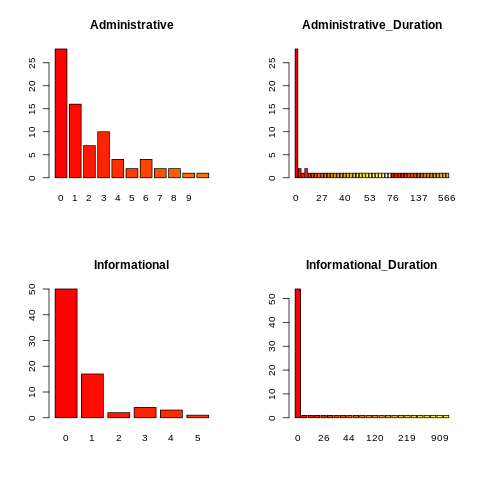

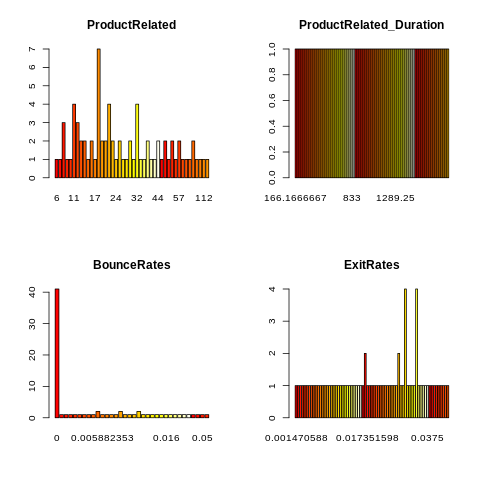

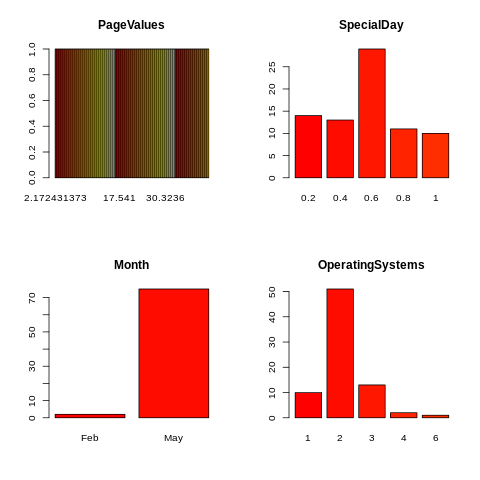

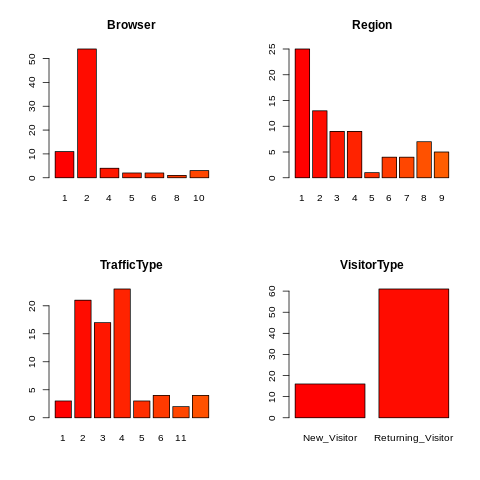

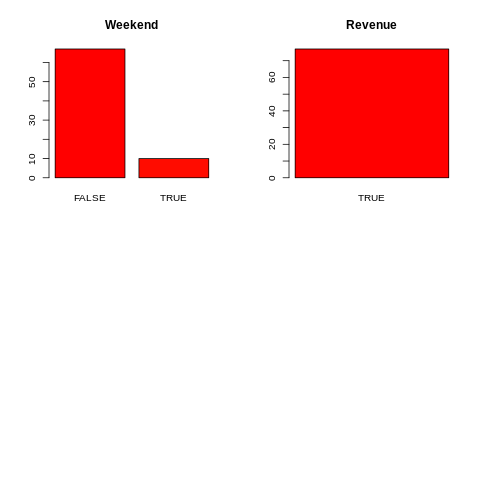

In [ ]:
%%R
#Near holiday revenues
holdy <- Rev[Rev$SpecialDay > 0,]
par(mfrow = c(2,2))
for (i in 1:18){
  barplot(table(holdy[,i]),main = names(holdy)[i], col = heat.colors((30)))
  
}


In [ ]:
%%R

#Descriptive statistics

describe(holdy)

holdy 

 20  Variables      77  Observations
--------------------------------------------------------------------------------
Administrative 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      77        0       11     0.94    2.078    2.596      0.0      0.0 
     .25      .50      .75      .90      .95 
     0.0      1.0      3.0      6.0      7.2 

lowest :  0  1  2  3  4, highest:  6  7  8  9 11
                                                                            
Value          0     1     2     3     4     5     6     7     8     9    11
Frequency     28    16     7    10     4     2     4     2     2     1     1
Proportion 0.364 0.208 0.091 0.130 0.052 0.026 0.052 0.026 0.026 0.013 0.013
--------------------------------------------------------------------------------
Administrative_Duration 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      77        0       48    0.952    62.32    89.73     0.00     0.00 
     .25  

> Most of the revenue earned was during the moth of May at 97.4% and feb with 2.6%.

> 66.2% of all revenue were visitors using operating system type 3 while 16.9% were using type 1

> Browser 2 had brought in the most revenue with 70.1% while browser 1 brough in 14.3% of the revenue.

>Regions 1,2,3 and 4 had significant contribution to the revenue earned near a holiday. 32.5% of all revenue were from region 1 followed by region 2 which had 16.9% of all revenue and region 3 and 4 each contributed 11.7% of the revenue.

> All the traffic during this period was from traffic type 1 to 6, and type 11 and 13. Most of the revenue came from traffic type 4 which brought in 29.9% of all revenue followed by type 2 which brought in 27.3% of all revenue.

> 20.8% of the revenue was from new visitors while 79.2% were return visitors.

> 13% of site revenue was gained during the weekend while the rest 87% was gained during the weekdays.


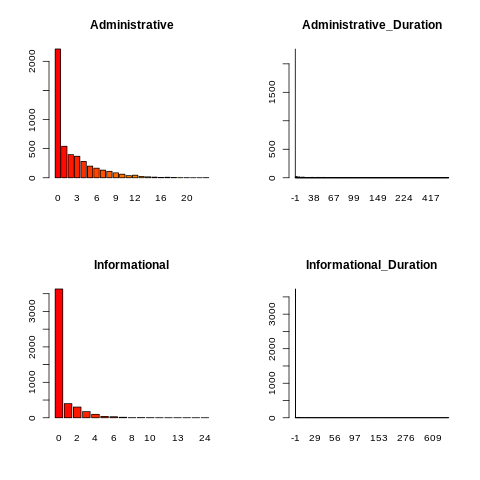

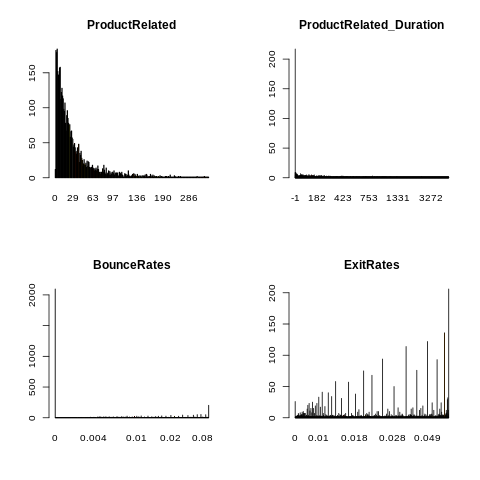

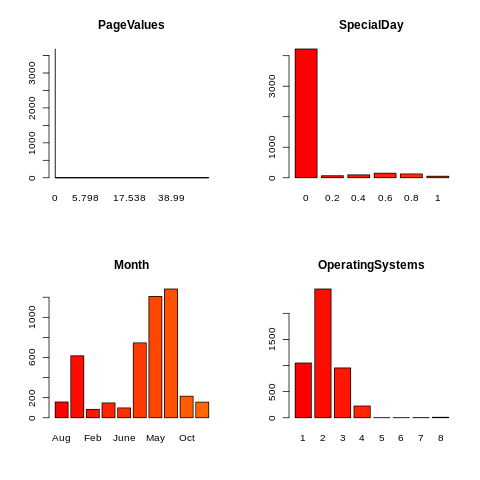

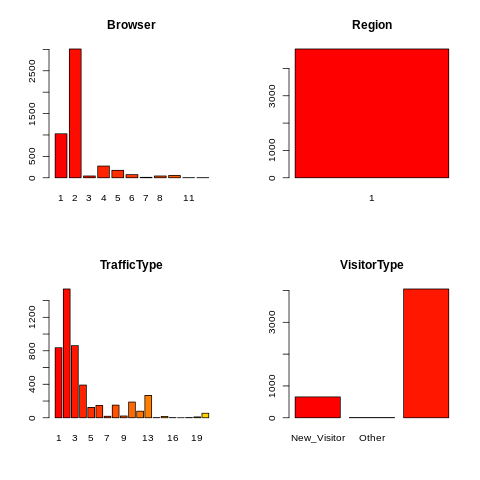

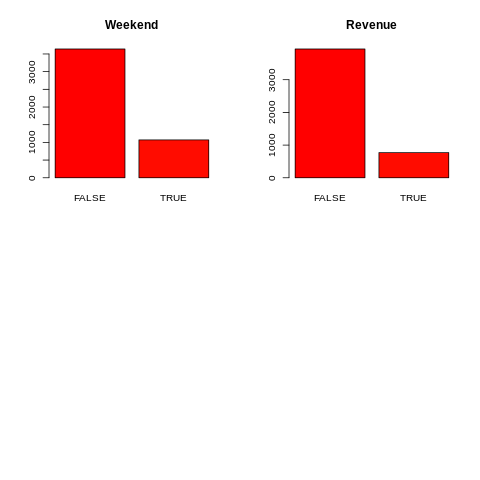

In [ ]:
%%R
#Revenue in region 1
region <- data[data$Region == 1,]
par(mfrow = c(2,2))
for (i in 1:18){
  barplot(table(region[,i]),main = names(region)[i], col = heat.colors((30)))
  
}


In [ ]:
%%R

#Descriptive statistics

describe(region)

region 

 20  Variables      4711  Observations
--------------------------------------------------------------------------------
Administrative 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4711        0       24    0.894    2.305    3.174        0        0 
     .25      .50      .75      .90      .95 
       0        1        4        7        9 

lowest :  0  1  2  3  4, highest: 19 20 21 22 23
--------------------------------------------------------------------------------
Administrative_Duration 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4711        0     1550     0.89    80.81    126.5      0.0      0.0 
     .25      .50      .75      .90      .95 
     0.0      7.0     88.0    219.3    349.6 

lowest :   -1.000000    0.000000    1.333333    2.000000    3.000000
highest: 2407.423810 2629.253968 2657.318056 2720.500000 3398.750000
--------------------------------------------------------------------------------
Inf


Looking at visitors behavior from the most popular region(1).

> Most popular months for visitors from region 1 are March, May and November.

> 52.3% of all visitors using operating system type 2 while 22.3% were using type 1

> Browser 2 had brought in the most visitors with 62.9% while browser 1 brough in 14.3% of the visitors.

>16.4% of all visitors from region one brought in revenue.

> Trffic type 1,2 and 3 bring in the most number of visitors from region 1 with type 2 being the highest at 32.6%.

> 13.9% of the visitors was from new visitors while 85.9% were return visitors.

> 22.7% of site visitors was gained during the weekend while the rest 77.3% was gained during the weekdays.


### Correlation Analysis

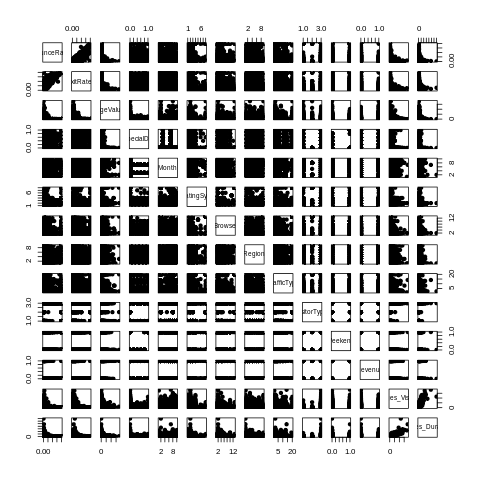

In [ ]:
%%R
#Pairplots
pairs(num.col, pch = 19)


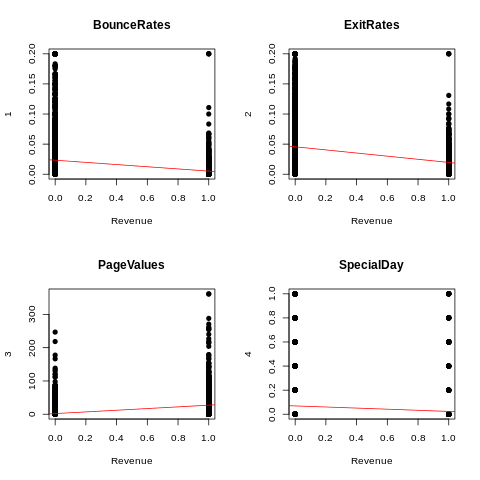

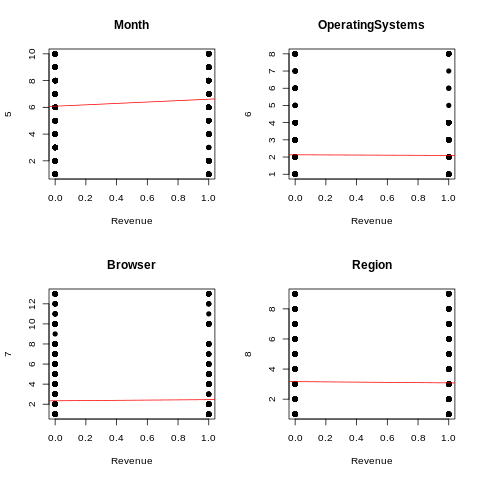

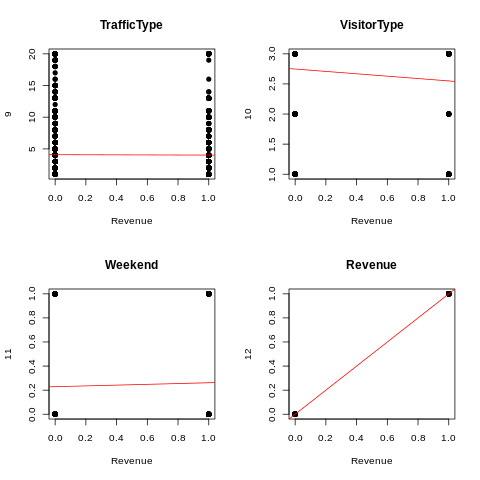

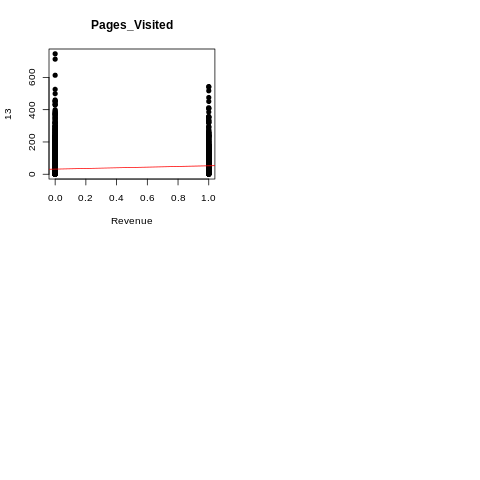

In [ ]:
%%R
#Scateer plot of 
par(mfrow = c(2,2))
for (i in 1:13){
  plot(new_data$Revenue, num.col[,i],main = names(num.col)[i], xlab = 'Revenue', ylab = i,pch = 19)
  # Add fit lines
  abline(lm(num.col[,i]~new_data$Revenue), col="red") # regression line (y~x)
}


In [ ]:
%%R
#### Correlation coefficients
cor(num.col)

                  BounceRates    ExitRates  PageValues   SpecialDay       Month
BounceRates       1.000000000  0.903358192 -0.11599198  0.087839995 -0.01915570
ExitRates         0.903358192  1.000000000 -0.17357154  0.116783762 -0.03578176
PageValues       -0.115991977 -0.173571542  1.00000000 -0.064532709  0.02133171
SpecialDay        0.087839995  0.116783762 -0.06453271  1.000000000  0.07899587
Month            -0.019155701 -0.035781758  0.02133171  0.078995868  1.00000000
OperatingSystems  0.026839839  0.016482012  0.01858378  0.012757766 -0.02697715
Browser          -0.016018380 -0.003565541  0.04584506  0.003465984 -0.04259743
Region            0.001432015 -0.001837556  0.01059087 -0.016452464 -0.03133960
TrafficType       0.089199039  0.087386232  0.01223694  0.052827944  0.04478663
VisitorType       0.132740668  0.177937038 -0.11026577  0.086683175  0.02604722
Weekend          -0.036412499 -0.054442881  0.01090437 -0.017635818  0.03010418
Revenue          -0.145388056 -0.2042968

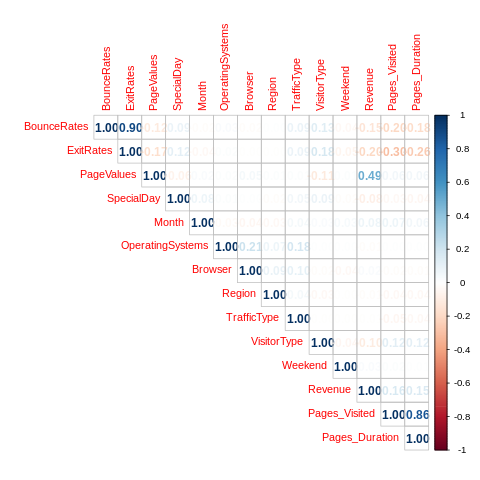

In [ ]:
%%R

corrplot(cor(num.col), type = 'upper', method = 'number', tl.cex = 0.9)

There is very weak correlation among the variables.


# Clustering

### Normalizing the data
Using the Revenue column as the class labels, we remove it from the clustering dataset

In [ ]:
%%R
web_traf <- num.col
web_traf[,c('Revenue')]<- list(NULL)
head(web_traf)


  BounceRates ExitRates PageValues SpecialDay Month OperatingSystems Browser
1  0.20000000 0.2000000          0          0     3                1       1
2  0.00000000 0.1000000          0          0     3                2       2
3  0.20000000 0.2000000          0          0     3                4       1
4  0.05000000 0.1400000          0          0     3                3       2
5  0.02000000 0.0500000          0          0     3                3       3
6  0.01578947 0.0245614          0          0     3                2       2
  Region TrafficType VisitorType Weekend Pages_Visited Pages_Duration
1      1           1           3       0             1       0.000000
2      1           2           3       0             2      64.000000
3      9           3           3       0             1      -3.000000
4      2           4           3       0             2       2.666667
5      1           4           3       1            10     627.500000
6      1           3           3       0 

In [ ]:
%%R
#Normalize the data
web_traf <- scale(web_traf)
head(web_traf, n = 3)

  BounceRates ExitRates PageValues SpecialDay     Month OperatingSystems
1   3.9546997  3.427307 -0.3190356 -0.3103105 -1.333953       -1.2396607
2  -0.4503438  1.265012 -0.3190356 -0.3103105 -1.333953       -0.1371074
3   3.9546997  3.427307 -0.3190356 -0.3103105 -1.333953        2.0679992
     Browser     Region TrafficType VisitorType    Weekend Pages_Visited
1 -0.7939682 -0.8962939  -0.7656224    0.409771 -0.5528638    -0.7270852
2 -0.2093703 -0.8962939  -0.5166068    0.409771 -0.5528638    -0.7056418
3 -0.7939682  2.4336556  -0.2675912    0.409771 -0.5528638    -0.7270852
  Pages_Duration
1     -0.6476960
2     -0.6163881
3     -0.6491635


## KMeans Clustering

Finding the best value for K

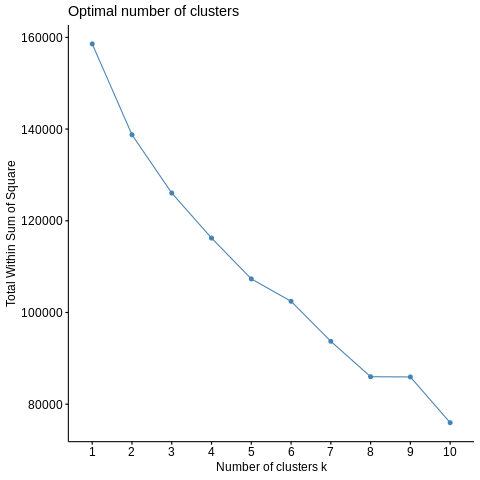

In [ ]:
%%R
# Determining Optimal clusters (k) Using Elbow method
#memory.limit(size=906000)
# library(cluster)
# library(factoextra)
fviz_nbclust(x = web_traf,FUNcluster = kmeans, method = 'wss' )


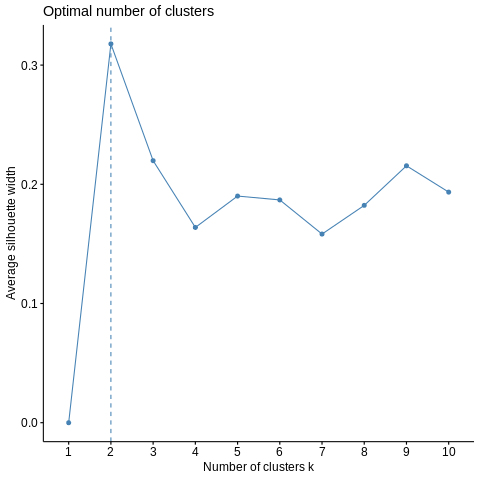

In [ ]:
%%R
# Determining Optimal clusters (k) Using Average Silhouette Method
library(factoextra)
fviz_nbclust(x = web_traf,FUNcluster = kmeans, method = 'silhouette' )

The above graph shows that the best value for k is 2

### k-means clustering 

R[write to console]: 
Attaching package: ‘gridExtra’


R[write to console]: The following object is masked from ‘package:dplyr’:

    combine




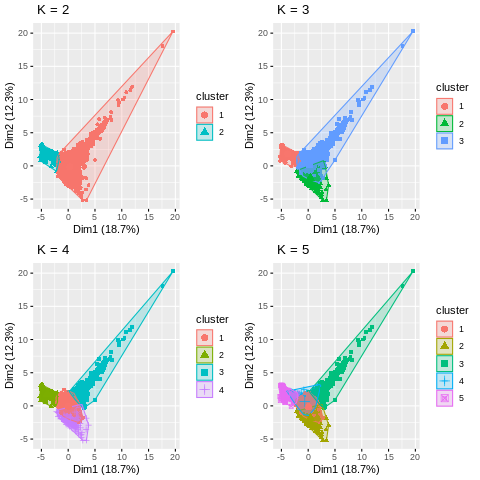

In [ ]:
%%R
#We will test out a few values of k
data_K2 <- kmeans(web_traf, centers = 2, nstart = 50)
data_K3 <- kmeans(web_traf, centers = 3, nstart = 50)
data_K4 <- kmeans(web_traf, centers = 4, nstart = 50)
data_K5 <- kmeans(web_traf, centers = 5, nstart = 50)

#plot these clusters for different K value to compare.
library(gridExtra)
p1 <- fviz_cluster(data_K2, geom = "point", data = web_traf) + ggtitle(" K = 2")
p2 <- fviz_cluster(data_K3, geom = "point", data = web_traf) + ggtitle(" K = 3")
p3 <- fviz_cluster(data_K4, geom = "point", data = web_traf) + ggtitle(" K = 4")
p4 <- fviz_cluster(data_K5, geom = "point", data = web_traf) + ggtitle(" K = 5")

grid.arrange(p1, p2, p3, p4, nrow = 2)

In [ ]:
%%R
set.seed(123)
#Computing the Kmeans clusters
data_Kmns1 <- kmeans(num.col, centers = 2, nstart = 25)
print(data_Kmns1)



K-means clustering with 2 clusters of sizes 11215, 984

Cluster means:
  BounceRates  ExitRates PageValues SpecialDay    Month OperatingSystems
1 0.021661633 0.04331428   5.834801 0.06357557 6.124030         2.123674
2 0.006600107 0.02078210   7.293964 0.04369919 6.668699         2.132114
   Browser   Region TrafficType VisitorType   Weekend   Revenue Pages_Visited
1 2.358181 3.174320    4.115203    2.694873 0.2349532 0.1434686      25.67945
2 2.357724 2.913618    3.611789    2.954268 0.2245935 0.3038618     140.08028
  Pages_Duration
1       884.4826
2      6333.6800

Clustering vector:
    1     2     3     4     5     6     7     8     9    10    11    12    13 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    1     

The variability in the clusters(given by the wcss) is 52.7%. The model is fairly compact.

In [ ]:
%%R
#Size of each cluster.
cat(data_Kmns1$size)

11215 984

In [ ]:
%%R
# Adding the clusters as a column to our original dataset

comp <- data %>%
  mutate(cluster = data_Kmns1$cluster) %>%
  select(Revenue, cluster) 
head(comp)

  Revenue cluster
1   FALSE       1
2   FALSE       1
3   FALSE       1
4   FALSE       1
5   FALSE       1
6   FALSE       1


In [ ]:
%%R
# Matching the cluster categories to the revenue for comparison
comp$cluster[comp$cluster == 1] <- 'FALSE'
head(comp)

  Revenue cluster
1   FALSE   FALSE
2   FALSE   FALSE
3   FALSE   FALSE
4   FALSE   FALSE
5   FALSE   FALSE
6   FALSE   FALSE


In [ ]:
%%R
#Comparing the revenue and the model cluster to see if the clusters match
table(comp$cluster == comp$Revenue) 


FALSE  TRUE 
 2593  9606 


Using the revenue column as our comparison labels to the model cluster. The model was able to match the revenue column with 78.74% accuracy, i.e. 9,606 columns matched.

## **Hierarchical Clustering**

## Calculate the distance

In [ ]:
%%R
library(cluster)
library(factoextra)
# methods to assess
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

# function to compute coefficient
ac <- function(x) {
  agnes(web_traf, method = x)$ac
}

map_dbl(m, ac)

In [ ]:
%%R
# First we use the dist() function to compute the Euclidean distance between observations, 
dist_uec <- dist(web_traf, method = "euclidean")

# compute the manhattan distance between observations, 
dist_man <- dist(web_traf, method = "manhattan")


R[write to console]: Error in rect.hclust(hcd, k = 2, border = 2:6) : 
  k must be between 2 and 0

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In system("timedatectl", intern = TRUE) :
R[write to console]: 
 
R[write to console]:  running command 'timedatectl' had status 1

R[write to console]: 2: 
R[write to console]: In plot.aggr(res, ...) :
R[write to console]: 
 
R[write to console]:  not enough horizontal space to display frequencies




Error in rect.hclust(hcd, k = 2, border = 2:6) : 
  k must be between 2 and 0


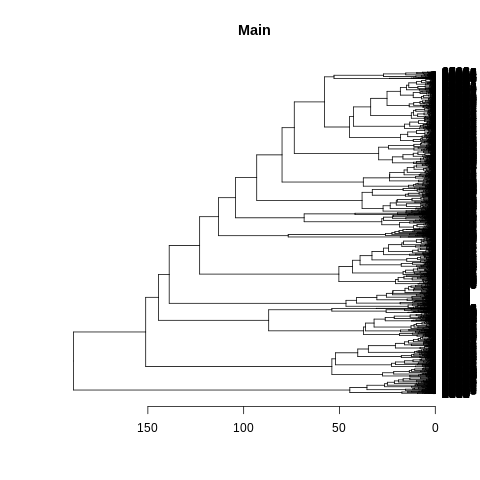

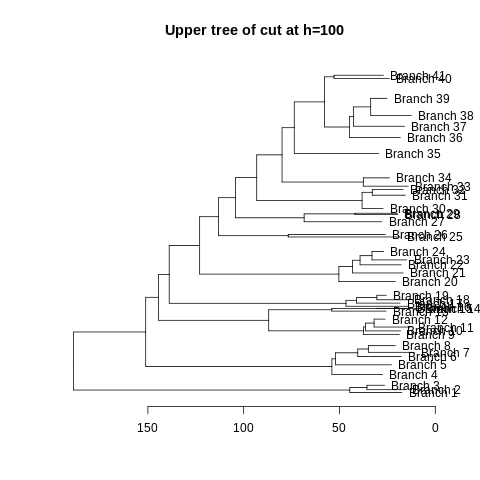

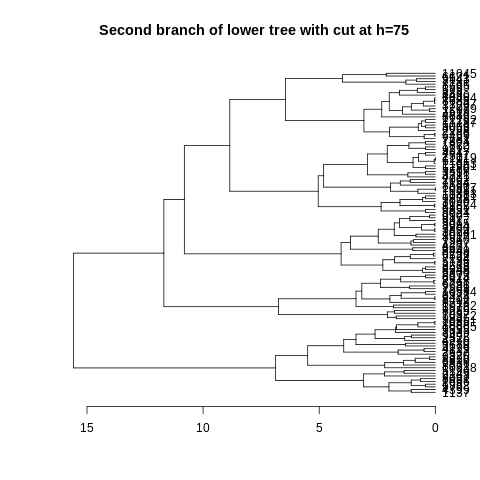

RInterpreterError: ignored

In [ ]:
%%R
#Eclidian distance
hc.avg <- hclust(dist_uec, method = "ward.D2")
hcd <- as.dendrogram(hc.avg)


par(mfrow=c(1,1))

plot(hcd, main="Main",horiz=T)

plot(cut(hcd, h=30)$upper, 
     main="Upper tree of cut at h=100",horiz=T)
plot(cut(hcd, h=30)$lower[[2]], 
     main="Second branch of lower tree with cut at h=75",horiz=T)
rect.hclust(hcd , k = 2, border = 2:6)
abline(h = 2, col = 'red')


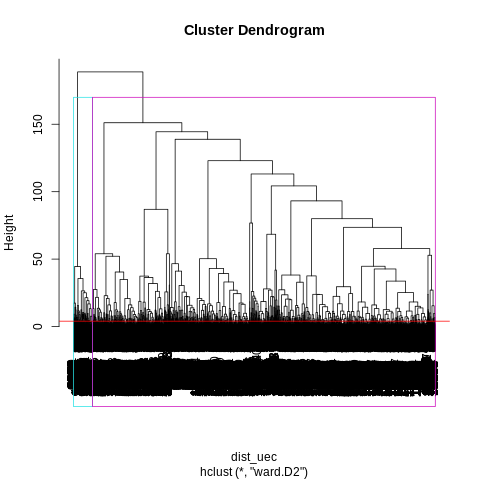

In [ ]:
%%R
#use R's cutree() function to cut the tree with hclust_avg as one parameter and the other parameter as h = 3
hc.avg <- hclust(dist_uec, method = "ward.D2")
cut_avg <- cutree(hc.avg, k = 2)

plot(hc.avg)
rect.hclust(hc.avg , k = 2, border = 5:6)
abline(h = 4, col = 'red')



In [ ]:
%%R
# Ward's method
hc5 <- hclust(dist_uec, method = "ward.D2" )

# Cut tree into 2 groups
sub_grp <- cutree(hc5, k = 2)

# Number of members in each cluster
table(sub_grp)

sub_grp
    1     2 
  640 11559 


In [ ]:
%%R
# Ward's method
hc_complete <- hclust(dist_uec, method = "complete" )

# Cut tree into 2 groups
sub_grp3 <- cutree(hc_complete, k = 2)

# Number of members in each cluster
table(sub_grp3)

sub_grp3
    1     2 
12197     2 


In [ ]:
%%R
# Ward's method
hc_avg <- hclust(dist_uec, method = "average" )

# Cut tree into 2 groups
sub_grp2 <- cutree(hc_avg, k = 2)

# Number of members in each cluster 
table(sub_grp2)

sub_grp2
    1     2 
12197     2 


In [ ]:
%%R
# Ward's method
hc_complete <- hclust(dist_man, method = "ward.D2" )

# Cut tree into 2 groups
sub_grp3 <- cutree(hc_complete, k = 2)

# Number of members in each cluster
table(sub_grp3)

sub_grp3
    1     2 
  908 11291 


In [ ]:
%%R

hcomp <- new_data %>%
  mutate(cluster = sub_grp) %>%
  head

In [ ]:
%%R
# Adding the clusters as a column to our original dataset

hcomp <- data %>%
  mutate(cluster2 = sub_grp) %>%
  select(Revenue, cluster2) 
tail(hcomp, n= 10)

      Revenue cluster2
12202   FALSE        2
12203   FALSE        1
12204   FALSE        2
12205   FALSE        2
12206   FALSE        2
12207   FALSE        2
12208   FALSE        2
12209   FALSE        2
12210   FALSE        2
12211   FALSE        2


In [ ]:
%%R
# Matching the cluster categories to the revenue for comparison
hcomp$cluster2[hcomp$cluster2 == 2] <- 'FALSE'
hcomp$cluster2[hcomp$cluster2 == 1] <- 'TRUE'
head(hcomp)

  Revenue cluster2
1   FALSE     TRUE
2   FALSE    FALSE
3   FALSE     TRUE
4   FALSE    FALSE
5   FALSE    FALSE
6   FALSE    FALSE


In [ ]:
%%R
#Comparing the revenue and the model cluster to see if the clusters match
table(hcomp$cluster == hcomp$Revenue) 


FALSE  TRUE 
 2542  9657 


Using the revenue column as our comparison labels to the model cluster. The model was able to match the revenue column with 79.16% accuracy, i.e. 9,657 columns matched. Slight improvement from the kmeans model.

# Conclusion

* Most of the wed visits were during the month of May but Novemder had more revenue than may.
* Mothers day holiday brought in more revenue than Valentines day.
* Most of the traffic and revenue was from region 1. During the holidays, more regions visit the site and contribute significantly to the total revenue.
* Traffic type 2 brough in the most visitors. Some of the traffic types did not bring in any visitors for all the 10 months under analysis.They should be eliminated when considering advertisement or re evaluated to find out the problem.
* Most of the revenue and visits was from return visitors. A good indicator of customer satisfaction.

* Return custmers are the main source of revenue
* Bounce rate is high especial for new customers.
* Most of the site visits did not yeild in revenue
